In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#Put Github cell in coursework as well

#This x does nothing apparently...
X = np.array([[2], [7]])
X = np.reshape(X, (2, 1))

#Morning and Afternoon Wind Speed in Australia

a = np.array([3, 9, 5, 10])

b  = np.array([2, 7, 8, 15])

#MU = np.array([[6.75], [8]])
MU = np.array([[3], [8]])
MU = np.reshape(MU, (2, 1))

In [3]:
print("\nArray a: ", a, "\n")
print("Array b: ", b, "\n")

#Retrieve covariance and 1x1 Scalar

cov = np.cov(a, b)

print("Covariance Matrix of Row Vectors = ", cov) # show covariance

print("\nCovariance Matrix Dimension: ", cov.ndim) 

S = np.array([(X - MU.T)@np.linalg.inv(cov)@(X - MU)])


print("\n(x - m^T) * E^-1 * (x - m) = ", S, '\n')
print('Matrix (Scalar) Dimension of Result: ', S.ndim)


#2-D Contour plots

#------------
#Diagonalise the covariance matrix:

#Check if Matrix is Symmetric
print('------\n\nCheck if Covariance Matrix is symmetric, cov should be equal to its transpose: '
      , cov == cov.T, '\n')

#Get Eigenvectors and Values
V, P = np.linalg.eigh(cov)
print('Eigenvalues: \n', V, '\n')
print('Eigenvectors: \n', P, '\n')


# Convert Eigenvectors to Diagonal Matrix
D = np.diag(V)
print('Diagonal Matrix: \n', D)

print('P = \n', P, '\n')
print('D = \n', D, '\n')
print('P x D x P^-1 = \n', P@D@np.linalg.inv(P), '\n')

print('Does P x D x P^-1 = E?\n')
print('Evaluating E with PDP^-1: \n', np.isclose(cov, P@D@np.linalg.inv(P)))


Array a:  [ 3  9  5 10] 

Array b:  [ 2  7  8 15] 

Covariance Matrix of Row Vectors =  [[10.91666667 14.33333333]
 [14.33333333 28.66666667]]

Covariance Matrix Dimension:  2

(x - m^T) * E^-1 * (x - m) =  [[[-0.05736434]
  [-0.56511628]]] 

Matrix (Scalar) Dimension of Result:  3
------

Check if Covariance Matrix is symmetric, cov should be equal to its transpose:  [[ True  True]
 [ True  True]] 

Eigenvalues: 
 [ 2.93313561 36.65019772] 

Eigenvectors: 
 [[-0.87362455  0.48660061]
 [ 0.48660061  0.87362455]] 

Diagonal Matrix: 
 [[ 2.93313561  0.        ]
 [ 0.         36.65019772]]
P = 
 [[-0.87362455  0.48660061]
 [ 0.48660061  0.87362455]] 

D = 
 [[ 2.93313561  0.        ]
 [ 0.         36.65019772]] 

P x D x P^-1 = 
 [[10.91666667 14.33333333]
 [14.33333333 28.66666667]] 

Does P x D x P^-1 = E?

Evaluating E with PDP^-1: 
 [[ True  True]
 [ True  True]]


In [4]:
#Multivariate function variables below:
# X1 = MU, the mean variable MU, has a mean of 6.75 (MU[0])
# Y1 = Variance, the 'a' variable of cov, is 10.9166 (cov[0])
# X2 = Mu, has a mean of 8 (MU[1])
# Y2 = Variance, has a value of 28.66 (cov[1])

#z = stats.multivariate_normal.pdf(point.flatten(), mean = MU.flatten(), cov = cov)

In [5]:
x = np.arange(-5, 20, 0.5)
y = np.arange(-5, 20, 0.5)
x, y = np.meshgrid(x,y)
z = np.zeros(x.shape)

for i in range(len(y)):
    for j in range(len(x)):
        point = np.array([[x[i,j]],[y[i,j]]]) #X and Y values
        z[i, j] = stats.multivariate_normal.pdf(point.flatten(), mean = MU.flatten(), cov = cov)

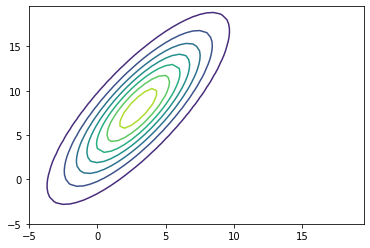

In [6]:
fig = plt.subplot()

fig.contour(x,y,z)

#fig.clabel(contour, inline=1, fontsize=10)
plt.show()

In [7]:
print("Covariance Matrix: ", cov)
print("\nChecking determinant: ", np.linalg.det(cov))

#Check if Matrix is Symmetric
print('\nCheck if Matrix is symmetric, M should be equal to its transpose: '
      , cov == cov.T, '\n')

#Get Eigenvectors and Valuesax.clabel(CS, inline=1, fontsize=10)
V, P = np.linalg.eigh(cov)
print('Eigenvalues: \n', V, '\n')
print('Eigenvectors: \n', P, '\n')


# Convert Eigenvectors to Diagonal Matrix
D = np.diag(V)
print('Diagonal Matrix: \n', D)

print('P = \n', P, '\n')
print('D = \n', D, '\n')
print('P x D x P^-1 = \n', P@D@np.linalg.inv(P), '\n')

print('Does P x D x P^-1 = M?\n')
print('Evaluating Covariance with PDP^-1: \n', np.isclose(cov, P@D@np.linalg.inv(P)))

Covariance Matrix:  [[10.91666667 14.33333333]
 [14.33333333 28.66666667]]

Checking determinant:  107.49999999999996

Check if Matrix is symmetric, M should be equal to its transpose:  [[ True  True]
 [ True  True]] 

Eigenvalues: 
 [ 2.93313561 36.65019772] 

Eigenvectors: 
 [[-0.87362455  0.48660061]
 [ 0.48660061  0.87362455]] 

Diagonal Matrix: 
 [[ 2.93313561  0.        ]
 [ 0.         36.65019772]]
P = 
 [[-0.87362455  0.48660061]
 [ 0.48660061  0.87362455]] 

D = 
 [[ 2.93313561  0.        ]
 [ 0.         36.65019772]] 

P x D x P^-1 = 
 [[10.91666667 14.33333333]
 [14.33333333 28.66666667]] 

Does P x D x P^-1 = M?

Evaluating Covariance with PDP^-1: 
 [[ True  True]
 [ True  True]]


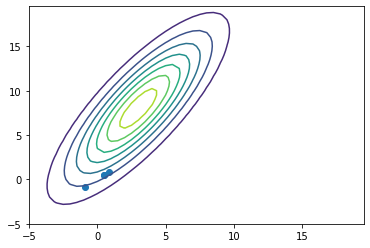

In [8]:
fig = plt.subplot()

fig.contour(x,y,z)
fig.scatter(P, P)

#fig.clabel(contour, inline=1, fontsize=10)
plt.show()

In [9]:
MU = np.reshape(MU, (2))

In [10]:
sample = stats.multivariate_normal.rvs(mean = MU, cov = cov, size = (2))

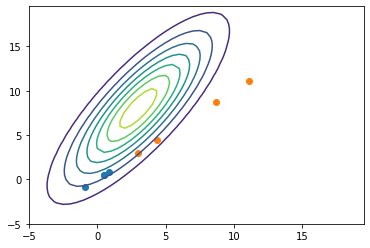

In [11]:
fig = plt.subplot()

fig.contour(x,y,z)
fig.scatter(P, P)
fig.scatter(sample, sample)

#fig.clabel(contour, inline=1, fontsize=10)
plt.show()

In [12]:
sample_MU = np.mean(sample)
sample_cov = np.cov(sample)

print(sample_MU)
print(sample_cov)

C = sample_cov
del(sample_cov)

6.791393169508305
[[16.08500927 19.01666482]
 [19.01666482 22.48264423]]


In [14]:
print("Covariance Matrix: ", C)
print("\nChecking determinant: ", np.linalg.det(C))

#Check if Matrix is Symmetric
print('\nCheck if Matrix is symmetric, M should be equal to its transpose: '
      , C == C.T, '\n')

#Get Eigenvectors and Valuesax.clabel(CS, inline=1, fontsize=10)
V, P = np.linalg.eigh(C)
print('Eigenvalues: \n', V, '\n')
print('Eigenvectors: \n', P, '\n')


# Convert Eigenvectors to Diagonal Matrix
D = np.diag(V)
print('Diagonal Matrix: \n', D)

print('P = \n', P, '\n')
print('D = \n', D, '\n')
print('P x D x P^-1 = \n', P@D@np.linalg.inv(C), '\n')

print('Does P x D x P^-1 = M?\n')
print('Evaluating Covariance with PDP^-1: \n', np.isclose(C, P@D@np.linalg.inv(C)))

Covariance Matrix:  [[16.08500927 19.01666482]
 [19.01666482 22.48264423]]

Checking determinant:  -6.756076521771689e-14

Check if Matrix is symmetric, M should be equal to its transpose:  [[ True  True]
 [ True  True]] 

Eigenvalues: 
 [-1.77635684e-15  3.85676535e+01] 

Eigenvectors: 
 [[-0.76350535  0.6458015 ]
 [ 0.6458015   0.76350535]] 

Diagonal Matrix: 
 [[-1.77635684e-15  0.00000000e+00]
 [ 0.00000000e+00  3.85676535e+01]]
P = 
 [[-0.76350535  0.6458015 ]
 [ 0.6458015   0.76350535]] 

D = 
 [[-1.77635684e-15  0.00000000e+00]
 [ 0.00000000e+00  3.85676535e+01]] 

P x D x P^-1 = 
 [[ 7.01071089e+15 -5.92992256e+15]
 [ 8.28848382e+15 -7.01071089e+15]] 

Does P x D x P^-1 = M?

Evaluating Covariance with PDP^-1: 
 [[False False]
 [False False]]
